In [1]:
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np
import cv2

In [57]:
filename = 'Yi_No_Data_April4_UnicodeProblem.csv'
df = pd.read_csv (filename)
df.shape, df.head()

((33432, 11),
   author  class_gram class_type  class code  pos_x  pos_y  size  confidence  \
 0     yi           0        num      1    0    148   1886    15       77.12   
 1     yi           0        num      1    0   1194   1890    15        0.71   
 2     yi           0        num      1    0   1176   1889    15        0.83   
 3     yi           0        num      1    0   1180   1885    14       78.98   
 4     yi           0        num      1    0    104   1882    23        1.00   
 
    difference                                             base64  
 0        0.19  Qk02CAAAAAAAADYEAAAoAAAAIAAAACAAAAABAAgAAAAAAA...  
 1        0.21  Qk02CAAAAAAAADYEAAAoAAAAIAAAACAAAAABAAgAAAAAAA...  
 2        0.22  Qk02CAAAAAAAADYEAAAoAAAAIAAAACAAAAABAAgAAAAAAA...  
 3        0.23  Qk02CAAAAAAAADYEAAAoAAAAIAAAACAAAAABAAgAAAAAAA...  
 4        0.24  Qk02CAAAAAAAADYEAAAoAAAAIAAAACAAAAABAAgAAAAAAA...  )

In [28]:
import base64
def cv_from_b64 (s):
    str = base64.b64decode (s)
    nparr = np.frombuffer (str, np.uint8)
    img = cv2.imdecode (nparr, cv2.IMREAD_ANYCOLOR)
    return img
#

def imdsp (cvimg):
    img2 = cvimg[:,:,::-1]
    plt.imshow(img2)
    plt.show()
#

s = df['base64'][0]
print ('b64string = ', s[:20])
str = base64.b64decode(s)
print ('decoded = ', str[:20])
nparr = np.frombuffer (str, np.uint8)
print ('nparr = ', nparr.shape, nparr[:50])
img = cv2.imdecode(nparr, cv2.IMREAD_ANYCOLOR)


b64string =  Qk02CAAAAAAAADYEAAAo
decoded =  b'BM6\x08\x00\x00\x00\x00\x00\x006\x04\x00\x00(\x00\x00\x00 \x00'
nparr =  (2102,) [66 77 54  8  0  0  0  0  0  0 54  4  0  0 40  0  0  0 32  0  0  0 32  0
  0  0  1  0  8  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0]


In [35]:
print (df.iloc[3000])
img = cv_from_b64 (df['base64'][3000])
img.shape, img, img[0,0]

author                                                       yi
class_gram                                                    0
class_type                                                  kor
class                                                       205
code                                                          게
pos_x                                                       356
pos_y                                                       825
size                                                         28
confidence                                                  0.9
difference                                                  0.2
base64        Qk02CAAAAAAAADYEAAAoAAAAIAAAACAAAAABAAgAAAAAAA...
Name: 3000, dtype: object


((32, 32), array([[255, 255, 255, ...,  78, 252, 255],
        [255, 255, 255, ...,   0,  48, 255],
        [255, 255, 255, ...,   0,  44, 235],
        ...,
        [255, 255, 255, ...,   0,  48, 255],
        [255, 255, 255, ...,   0,  48, 255],
        [255, 255, 255, ..., 251, 252, 255]], dtype=uint8), 255)

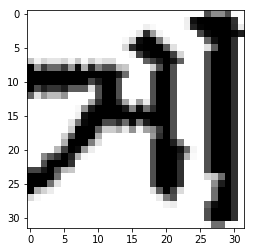

In [34]:
plt.imshow (img, cmap='gray')
plt.show ()

author                                                       no
class_gram                                                    0
class_type                                                  chi
class                                                      1848
code                                                          說
pos_x                                                       698
pos_y                                                       933
size                                                         47
confidence                                                 81.9
difference                                                 0.27
base64        Qk02CAAAAAAAADYEAAAoAAAAIAAAACAAAAABAAgAAAAAAA...
Name: 33000, dtype: object
(32, 32)


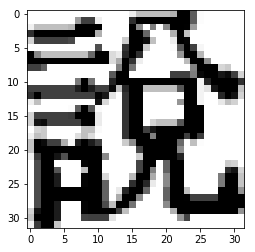

In [58]:
indx = 33000
print (df.iloc[indx])
img = cv_from_b64 (df['base64'][indx])
print (img.shape)
plt.imshow (img, cmap='gray')
plt.show()

In [64]:
img.shape, len(img.shape) == 2

((32, 32), True)

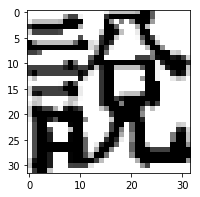

In [76]:
plt.figure(figsize=(3,3))
plt.imshow (img, cmap='gray', resample=False, interpolation=None)
plt.show()

In [78]:
from IPython.display import display, HTML

def imshow(name, imageArray):
     _, png = cv2.imencode('.png', imageArray)
     encoded = base64.b64encode(png)
     return HTML(data='''<img alt="{0}" src="data:image/png;base64, {1}"/>'''.format(name, encoded.decode('ascii')))
#

In [79]:
imshow('image display', img)